In [53]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.model_selection import train_test_split, KFold

import seaborn as sb

from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Считывание хороших и плохих контрактов
bad_cntr = pd.read_csv('yarobl_bad_contracts_plus.csv')
good_cntr = pd.read_csv('yaroblmz_good_contracts.csv')
data = bad_cntr.append(good_cntr)
print(data.shape)

# Сокращение количества хороших контрактов до числа имеющихся плохих
# data = good_cntr.append(bad_cntr.iloc[:good_cntr.shape[0],:])
# print(data.shape)

(11926, 15)


In [4]:
data.head(5)

,cntrID,org_cntr_num,org_1s_sev,org_1s_sup_sev,sup_cntr_num,sup_cntr_avg_price,sup_cntr_avg_penalty,sup_no_pnl_share,sup_okpd_exp,sup_1s_sev,sup_1s_org_sev,sup_sim_price,price_higher_pmp,price_too_low,cntr_result
0,1573678,871,0.0,0.0,2,189491.0,0.0,1.0,0.50000,0,0.0,0.50000,0,0,0
1,1505114,188,0.0,0.0,22,267789.0,0.0,1.0,1.00000,0,0.0,0.09091,0,0,0
2,1516375,199,0.0,0.0,5,386494.0,0.0,1.0,1.00000,0,0.0,0.20000,0,0,0
3,1603679,52,0.0,0.0,43,272642.0,0.0,1.0,0.18605,0,0.0,0.04651,0,0,0
4,1511046,569,0.0,0.0,47,487732.0,0.0,1.0,0.61702,0,0.0,0.02128,0,1,0


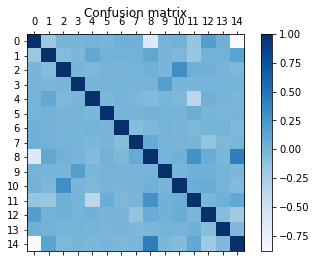

In [41]:
def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues, ):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=cmap)
    plt.title(title)
    fig.colorbar(cax)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(1))
    plt.show()

plot_confusion_matrix(data.corr(), data.columns)
# plt.matshow(data.corr())

In [5]:
# Удаление строк, в которых есть значение NULL
data = data.dropna()

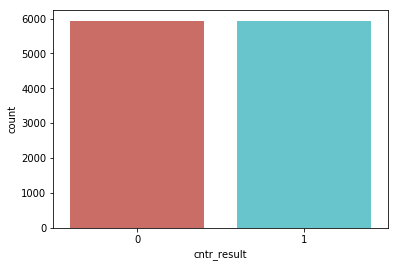

In [6]:
# Количество плохих (=0) и хороших контрактов (=1)
sb.countplot(x='cntr_result', data=data, palette='hls')

In [7]:
# Разбитие датасета на набор описывающих признаков (X) 
# и соответствущих им предсказываемых величин (у)
X = data.iloc[:,1:-1]
y = data.cntr_result.values

In [8]:
# Описательные статистики атрибутов
X.describe()

,org_cntr_num,org_1s_sev,org_1s_sup_sev,sup_cntr_num,sup_cntr_avg_price,sup_cntr_avg_penalty,sup_no_pnl_share,sup_okpd_exp,sup_1s_sev,sup_1s_org_sev,sup_sim_price,price_higher_pmp,price_too_low
count,11862.000000,11862.000000,11862.000000,11862.000000,1.186200e+04,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000,11862.000000
mean,1013.522762,0.000395,0.000043,52.709492,1.404311e+06,0.000083,0.996570,0.851908,0.000422,0.002482,0.369367,0.053448,0.077980
std,1468.801179,0.002894,0.000863,108.972630,2.277167e+07,0.002255,0.034587,0.328467,0.020527,0.044228,0.339632,0.224935,0.268152
min,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.000000,0.000000,0.000000,2.000000,1.329270e+05,0.000000,1.000000,0.980320,0.000000,0.000000,0.111110,0.000000,0.000000
50%,396.000000,0.000000,0.000000,12.000000,2.191050e+05,0.000000,1.000000,1.000000,0.000000,0.000000,0.217390,0.000000,0.000000
75%,1260.000000,0.000000,0.000000,52.000000,4.259550e+05,0.000000,1.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000
max,6408.000000,0.076920,0.047620,1849.000000,1.303496e+09,0.120910,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Предобработка данных
# Медиана = 1, квадратичное отклонени = 0
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 1. Обучение и тестирование на одной выборке

In [406]:
reg1 = LogisticRegression().fit(X, y) 

In [407]:
print('Точность %s' % accuracy_score(y, reg1.predict(X)))
print('Потеря перекрестной энтропии %s' % log_loss(y, reg1.predict_proba(X)))

Точность 0.737143820604
Потеря перекрестной энтропии 0.513927453099


In [408]:
print(classification_report(y, reg1.predict(X), target_names=('Плохой', 'Хороший')))

             precision    recall  f1-score   support

     Плохой       0.94      0.50      0.66      5926
    Хороший       0.66      0.97      0.79      5936

avg / total       0.80      0.74      0.72     11862



### 2. На 70% выборки - обучение, на оставшихся 30% - тестирование

In [409]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [410]:
reg2 = LogisticRegression().fit(X_train, y_train)

In [411]:
print('Точность %s на обучающей выборке' % accuracy_score(y_train, reg2.predict(X_train)))
print('Точность %s на тестовой выборке' % accuracy_score(y_test, reg2.predict(X_test)))
print('Потеря перекрестной энтропии %s' % log_loss(y_test, reg2.predict_proba(X_test)))

Точность 0.739732626761 на обучающей выборке
Точность 0.727732509132 на тестовой выборке
Потеря перекрестной энтропии 0.514698536408


In [412]:
print(classification_report(y, reg2.predict(X), target_names=('Плохой', 'Хороший')))

             precision    recall  f1-score   support

     Плохой       0.95      0.50      0.65      5926
    Хороший       0.66      0.98      0.79      5936

avg / total       0.81      0.74      0.72     11862



### 3. Перекрестная проверка

Не забывай про правило локтя. Andrey N.G.

In [10]:
reg3 = LogisticRegression()

In [11]:
y_train_real = np.array([])
y_test_real = np.array([])

y_train_pred = np.array([])
y_test_pred = np.array([])
y_test_pred_proba = np.zeros((0, 2))

In [12]:
for train_index, test_index in KFold(n_splits=10).split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]
    
    reg3.fit(X_train, y_train)
    
    y_train_real = np.concatenate((y_train_real, y_train))
    y_test_real = np.concatenate((y_test_real, y_test))
    
    y_train_pred = np.concatenate((y_train_pred, reg3.predict(X_train)))
    y_test_pred = np.concatenate((y_test_pred, reg3.predict(X_test)))
    y_test_pred_proba = np.concatenate((y_test_pred_proba, reg3.predict_proba(X_test)))    

In [13]:
# Коэффициенты при объясняющих переменных в порядке возрастания
sorted(
    dict(
        zip(
            data.iloc[:,1:-1].columns, 
            list(reg3.coef_[0])
        )
    ).items(),
    key=lambda i: i[1]
)

[('sup_1s_org_sev', -1.4221097014884934),
 ('price_higher_pmp', -0.68004761964557681),
 ('sup_no_pnl_share', -0.36685251587583523),
 ('sup_1s_sev', -0.14531454922030848),
 ('price_too_low', -0.13151011031138682),
 ('sup_cntr_avg_penalty', -0.12650400477908127),
 ('sup_sim_price', -0.0512395474339465),
 ('org_1s_sev', -0.034292182204872464),
 ('sup_cntr_num', -0.030482787348224381),
 ('sup_cntr_avg_price', -0.02692158200958273),
 ('org_1s_sup_sev', 0.018252178603792593),
 ('org_cntr_num', 0.29963388849963291),
 ('sup_okpd_exp', 2.3231316923924155)]

In [14]:
print('Точность %s на обучающей выборке' % accuracy_score(y_train_real, y_train_pred))
print('Точность %s на тестовой выборке' % accuracy_score(y_test_real, y_test_pred))
print('Потеря перекрестной энтропии %s' % log_loss(y_test_real, y_test_pred_proba))

Точность 0.737537233744 на обучающей выборке
Точность 0.708565166077 на тестовой выборке
Потеря перекрестной энтропии 0.604331348954


In [15]:
print(classification_report(y_test_real, y_test_pred, target_names=('Плохой', 'Хороший')))

             precision    recall  f1-score   support

     Плохой       0.88      0.48      0.62      5926
    Хороший       0.64      0.93      0.76      5936

avg / total       0.76      0.71      0.69     11862



In [61]:
def predict_probalistic(data_row):
    report_str = 'Cntr ID: {}\nReal result: {}\nBad cntr prob: {}\nGood cntr prob: {}\nPred class: {}'
    
    x_ = data_row.iloc[:, 1:-1]
    x_ = scaler.fit_transform(x_)
    prediction = reg3.predict_proba(x_)[0]
    
    print(report_str.format(
        data_row.cntrID.values[0],
        data_row.cntr_result.values[0],
        prediction[0],
        prediction[1],
        reg3.predict(x_)[0]
    ))

In [62]:
row = data.sample(1)
row.head()

,cntrID,org_cntr_num,org_1s_sev,org_1s_sup_sev,sup_cntr_num,sup_cntr_avg_price,sup_cntr_avg_penalty,sup_no_pnl_share,sup_okpd_exp,sup_1s_sev,sup_1s_org_sev,sup_sim_price,price_higher_pmp,price_too_low,cntr_result
1108,1394285,6408,0.0,0.0,12,1404678.0,0.0,1.0,1.0,0,0.0,0.25,0,0,1


In [63]:
predict_probalistic(row)

Cntr ID: 1394285
Real result: 1
Bad cntr prob: 0.7011288456740132
Good cntr prob: 0.29887115432598677
Pred class: 0


In [64]:
row = data.sample(1)
row.head()

,cntrID,org_cntr_num,org_1s_sev,org_1s_sup_sev,sup_cntr_num,sup_cntr_avg_price,sup_cntr_avg_penalty,sup_no_pnl_share,sup_okpd_exp,sup_1s_sev,sup_1s_org_sev,sup_sim_price,price_higher_pmp,price_too_low,cntr_result
1256,1394752,509,0.0,0.0,3,57333.0,0.0,1.0,1.0,0,0.0,0.33333,0,0,1


In [65]:
predict_probalistic(row)

Cntr ID: 1394752
Real result: 1
Bad cntr prob: 0.7011288456740132
Good cntr prob: 0.29887115432598677
Pred class: 0


In [66]:
row = data.sample(1)
row.head()

,cntrID,org_cntr_num,org_1s_sev,org_1s_sup_sev,sup_cntr_num,sup_cntr_avg_price,sup_cntr_avg_penalty,sup_no_pnl_share,sup_okpd_exp,sup_1s_sev,sup_1s_org_sev,sup_sim_price,price_higher_pmp,price_too_low,cntr_result
3270,1400359,1732,0.0,0.0,6,288994.0,0.0,1.0,1.0,0,0.0,0.33333,0,1,1


In [67]:
predict_probalistic(row)

Cntr ID: 1400359
Real result: 1
Bad cntr prob: 0.7011288456740132
Good cntr prob: 0.29887115432598677
Pred class: 0


In [36]:
res = pd.DataFrame({'result': y_test_real}).join(
    pd.DataFrame({'proba_pred': y_test_pred_proba[:,0]}).join(
        pd.DataFrame({'pred': y_test_pred})
    )
)

In [37]:
res.corr()

,result,proba_pred,pred
result,1.000000,-0.402965,0.467341
proba_pred,-0.402965,1.000000,-0.921953
pred,0.467341,-0.921953,1.000000


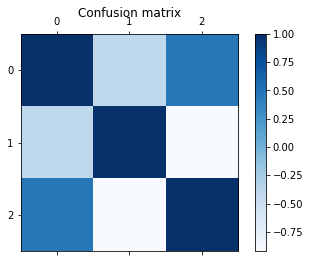

In [42]:
plot_confusion_matrix(res.corr(), res.columns)